# This part 2 of 3 TBD very soon

**Other notebooks:** <br>
[Part 1: Data mining and munging](tdp_1_3_data_mining_and_cleaning.ipynb)<br>
[Part 3: Data modeling](tdp_3_3_data_modeling.ipynb)

In [1]:
# %load_ext watermark
%reload_ext watermark
%watermark -a "Norbert Oksza Strzelecki" -v -p numpy,pandas,matplotlib,seaborn

Norbert Oksza Strzelecki 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.2
pandas 0.23.4
matplotlib 3.0.0
seaborn 0.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()

### Data loading

In [3]:
# Main data for modeling
biker_class = pd.read_csv('processed/clean_biker_class.csv', index_col=0)

# Additional parts for statistics
biker_stats = pd.read_csv('preprocessed/pre_biker_stats.csv', index_col=0)
biker_by_stage = pd.read_csv('preprocessed/pre_biker_by_stage.csv', index_col=0)
stage_results = pd.read_csv('preprocessed/pre_stages.csv', index_col=False)
stage_class = pd.read_csv('preprocessed/pre_stages_summary.csv', index_col=False)
stage_positions = pd.read_csv('preprocessed/pre_stage_positions.csv', index_col=False)

# Statistics

## Features correlation

In [4]:
biker_class.shape

(5255, 84)

In [5]:
biker_class[biker_class.time_in_s < 999999].shape

(4975, 84)

In [6]:
# Number of bikers that DNF or DNS in any stage
biker_class.shape[0] - biker_class[biker_class.time_in_s < 999999].shape[0]

280

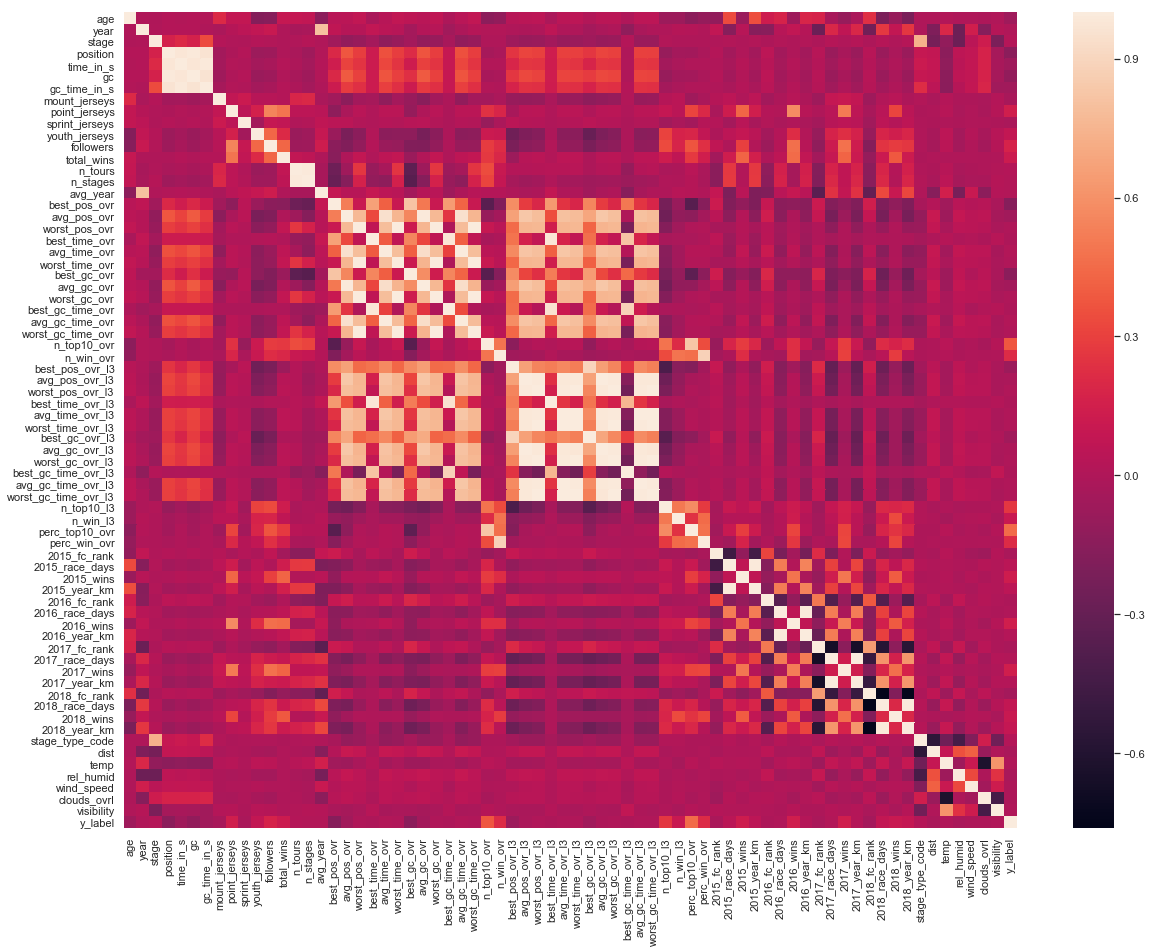

In [7]:
# plot heatmap

fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(biker_class.corr(), ax=ax)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90);

In [8]:
# Dataframe with no DNFs and DNSs set to '999999' value
biker_class[biker_class.time_in_s < 999999].describe().round(2)

,age,year,stage,position,time_in_s,gc,gc_time_in_s,mount_jerseys,point_jerseys,sprint_jerseys,...,2018_wins,2018_year_km,stage_type_code,dist,temp,rel_humid,wind_speed,clouds_ovrl,visibility,y_label
count,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,...,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00,4975.00
mean,28.20,2015.97,3.69,75.93,14469.70,75.93,53322.67,0.65,0.99,0.15,...,0.66,7822.47,1.93,164.29,25.91,38.52,2.50,4.30,7.44,0.07
std,4.25,1.44,1.93,45.93,5189.35,45.93,30607.92,1.36,2.43,0.45,...,1.54,3970.92,1.33,53.64,4.42,25.67,1.24,2.35,1.25,0.25
min,20.00,2014.00,1.00,1.00,1725.00,1.00,9783.00,0.00,0.00,0.00,...,0.00,0.00,1.00,25.00,12.50,0.00,0.00,0.00,4.00,0.00
25%,25.00,2015.00,2.00,37.00,11399.00,37.00,22603.50,0.00,0.00,0.00,...,0.00,5804.00,1.00,135.00,22.60,32.00,2.00,2.00,7.00,0.00
50%,28.00,2016.00,4.00,74.00,13358.00,74.00,53492.00,0.00,0.00,0.00,...,0.00,8794.20,1.00,161.00,25.60,38.00,3.00,4.00,8.00,0.00
75%,31.00,2017.00,5.00,111.50,19003.00,111.50,77169.00,1.00,1.00,0.00,...,1.00,10794.10,2.00,218.00,29.60,55.00,3.00,6.00,8.00,0.00
max,44.00,2018.00,7.00,199.00,24240.00,199.00,115326.00,11.00,36.00,4.00,...,17.00,14039.00,6.00,240.00,33.20,90.00,5.00,8.00,9.00,1.00


In [9]:
biker_class.describe(include='object')

,name,nation,team,2015_div,2015_team,2016_div,2016_team,2017_div,2017_team,2018_div,2018_team,date,finish,wind_dir
count,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255
unique,513,44,69,4,96,4,79,4,78,4,75,34,13,15
top,J.Fröhlinger,Italy,Team Sky,PRT,Team Katusha,PRT,Team Katusha,PRT,NONE,PRT,NONE,2016-07-12,Katowice,ESE
freq,34,875,250,3321,270,3716,265,3541,302,3219,541,200,818,943


## Age distribution

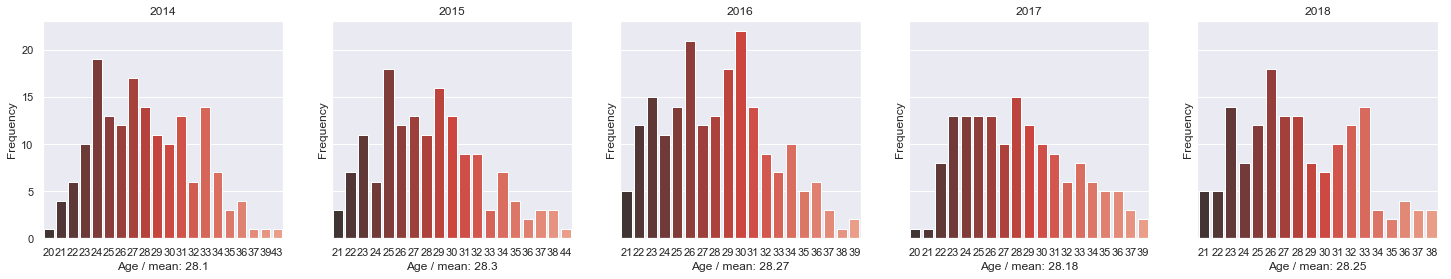

In [10]:
# Age distribution through tours
i = 0
fig, ax = plt.subplots(1,5, figsize=(25,4), sharey=True)
for year in range(2014,2019):
    sns.countplot(x="age", data=stage_results[stage_results.year == year][['name','age']].drop_duplicates(),
                  palette="Reds_d", orient='h', ax=ax[i])
    ax[i].set_title(year)
    ax[i].set_xlabel('Age / mean: %s' % round(stage_results[stage_results.year == year][['name','age']]\
                                              .drop_duplicates()['age'].mean(), 2))
    ax[i].set_ylabel('Frequency')
    i += 1

## Nationality distribution

In [11]:
print('Bikers are from {} different counties'.format(biker_class['nation'].drop_duplicates().count()))

Bikers are from 44 different counties


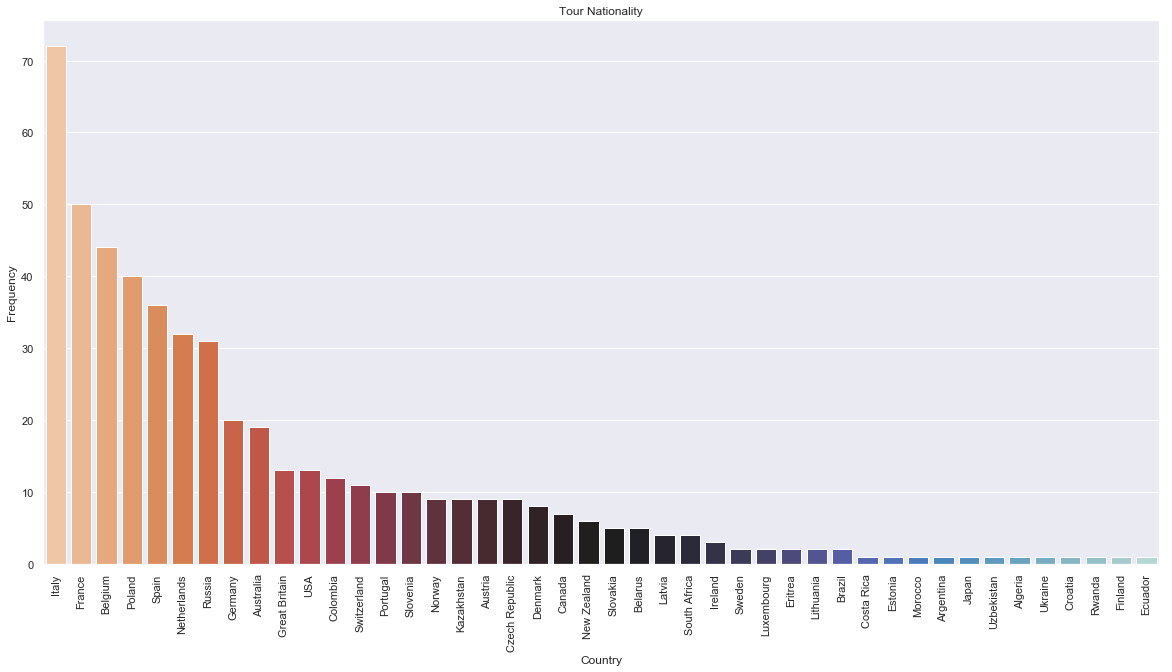

In [12]:
# Allover nationality distribution in all tours
nation_distribution = biker_class[['name','nation']].drop_duplicates()

plt.figure(figsize=(20,10))
sns.countplot(x='nation', 
              data=nation_distribution,
              order=nation_distribution['nation'].value_counts().index,
              palette="icefire_r")
plt.title('Tour Nationality')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Country')
plt.show()

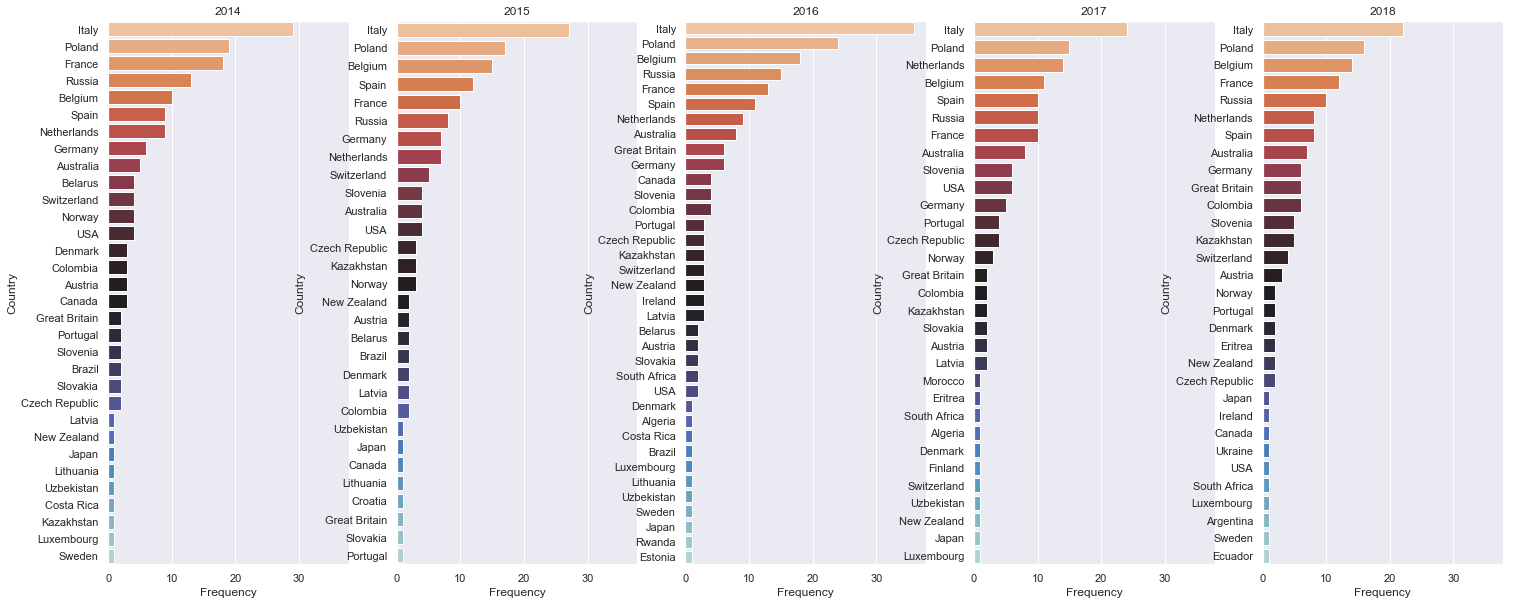

In [13]:
# Nationality distribution year-by-year
i = 0
fig, ax = plt.subplots(1,5, figsize=(25,10), sharey=False, sharex=True)

for year in range(2014,2019):
    
    nation_year_dist = biker_class[biker_class.year == year][['name','nation']].drop_duplicates()
    ax[i] = sns.countplot(y="nation", data=nation_year_dist,
#                   order=biker_class['nation'].value_counts().index,
                          order=nation_year_dist['nation'].value_counts().index,
                          palette="icefire_r", orient='h', ax=ax[i])
    ax[i].set_title(year)
    ax[i].set_xlabel('Frequency')
    ax[i].set_ylabel('Country')
    i += 1

## Top10 Jersey winners

In [14]:
def top10_jerseys_barplot(jersey_type, title):
    # Printing table
    print(biker_class[['name','nation',str(jersey_type)+'_jerseys']].drop_duplicates()\
          .sort_values(str(jersey_type)+'_jerseys',ascending=False).head(10).reset_index(drop=True))
    # Ploting barplot
    sns.barplot(x='name',
                y=str(jersey_type)+'_jerseys', data=biker_class[['name','nation',str(jersey_type)+'_jerseys']]\
                  .drop_duplicates().sort_values(str(jersey_type)+'_jerseys', ascending=False).head(10),
                palette="icefire_r")
    plt.xticks(rotation=90)
    plt.ylabel('No. of {} jerseys'.format(str(jersey_type)))
    plt.xlabel('Biker')
    plt.title('Top10 '+str(title))
    plt.show()

              name     nation  point_jerseys
0          P.Sagan   Slovakia             36
1        A.Greipel    Germany             23
2  E.Boasson Hagen     Norway             18
3         D.Tanner     Norway             16
4        D.Bennati      Italy             12
5       N.Bouhanni     France             10
6         M.Kittel    Germany             10
7         T.Farrar        USA              8
8      J.Guarnieri        USA              8
9          C.Meyer  Australia              8


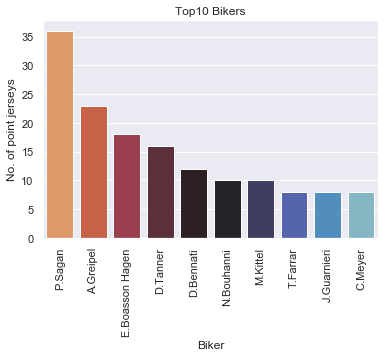

In [15]:
# Top10 bikers
top10_jerseys_barplot('point', 'Bikers')

           name   nation  mount_jerseys
0     P.Niemiec   Poland             11
1    T.De Gendt  Belgium             11
2  M.Rutkiewicz   Poland              7
3   B.Lambrecht  Belgium              5
4       R.Majka   Poland              4
5      O.Fraile    Spain              4
6     P.Gilbert  Belgium              4
7     W.Barguil   France              4
8    G.Preidler  Austria              4
9  T.Marczynski   Poland              4


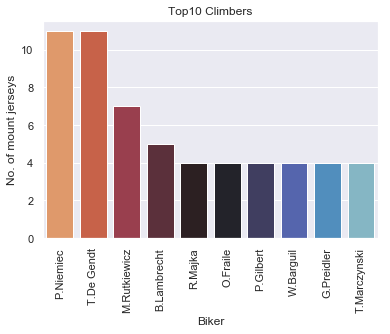

In [16]:
# Top10 climbers
top10_jerseys_barplot('mount','Climbers')

          name         nation  sprint_jerseys
0   T.De Gendt        Belgium               4
1    P.Gilbert        Belgium               4
2    J.Tratnik       Slovenia               2
3     S.Lander        Denmark               2
4  M.Burghardt        Germany               2
5   M.Albasini    Switzerland               2
6   G.Stepniak         Poland               2
7      A.Kurek         Poland               2
8   P.Williams  Great Britain               2
9   S.Paulinho       Portugal               2


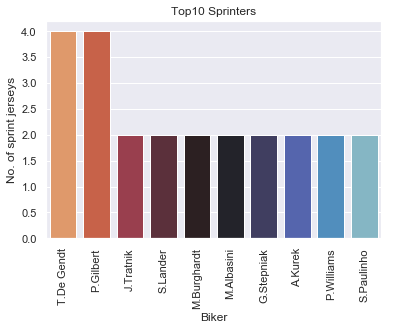

In [17]:
# Top10 sprinters
top10_jerseys_barplot('sprint', 'Sprinters')

## Stage positions

In [50]:
# sns.lineplot(x="timepoint", y="signal",
#              hue="region", style="event",
#              data=fmri)

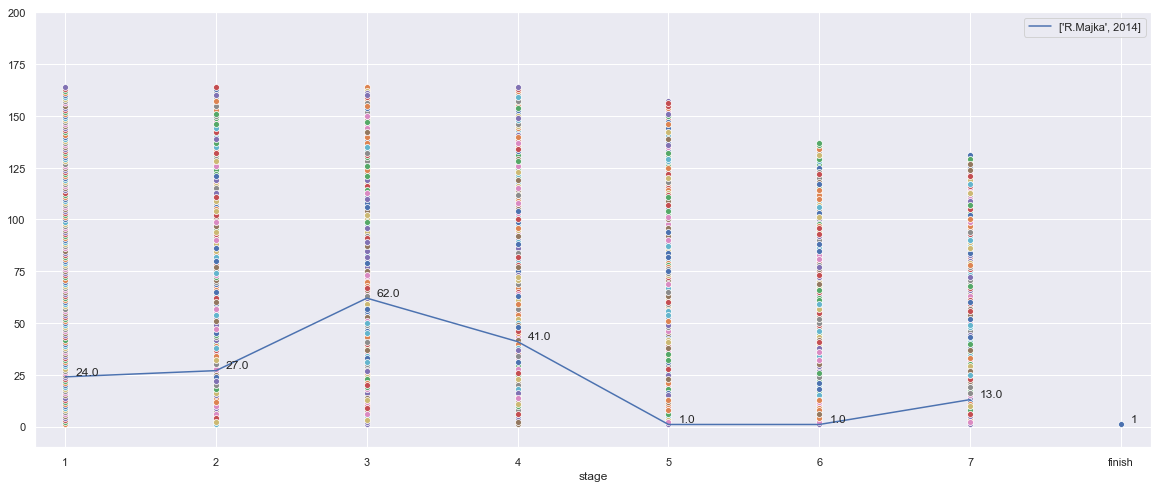

In [89]:
biker = 'R.Majka'

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

for year in np.arange(2014, 2015):

    x = stage_positions[stage_positions['year']==year]
    y = biker_class[(biker_class['year']==year) & (biker_class['name']==biker) & (biker_class['stage']==7)]

    if ((stage_positions['year']==year) & (stage_positions[biker].isnull())).any():
        continue
    else:
        ax = sns.lineplot(x='stage', y=biker, data=x, label=[biker, year])
        ax = sns.scatterplot(x=8, y='gc', data=y)
        for biker_ in [b for b in stage_positions.columns[7:]]:
            ax = sns.scatterplot(x='stage', y=biker_, data=x, label='')
        
        ax.annotate(str(y['gc'].values[0]), xy=(8,y['gc']), xytext=(10,2), textcoords='offset points')
        for i,j in zip(x['stage'],x[biker]):
            ax.annotate('%s' %j, xy=(i,j), xytext=(10,2), textcoords='offset points')
        
        
plt.xticks(np.arange(9), ('0','1','2','3','4','5','6','7','finish'), rotation=0)
plt.ylabel('')
plt.ylim(-10,200)
plt.xlim(0.8,8.2)
# plt.legend()
plt.show()

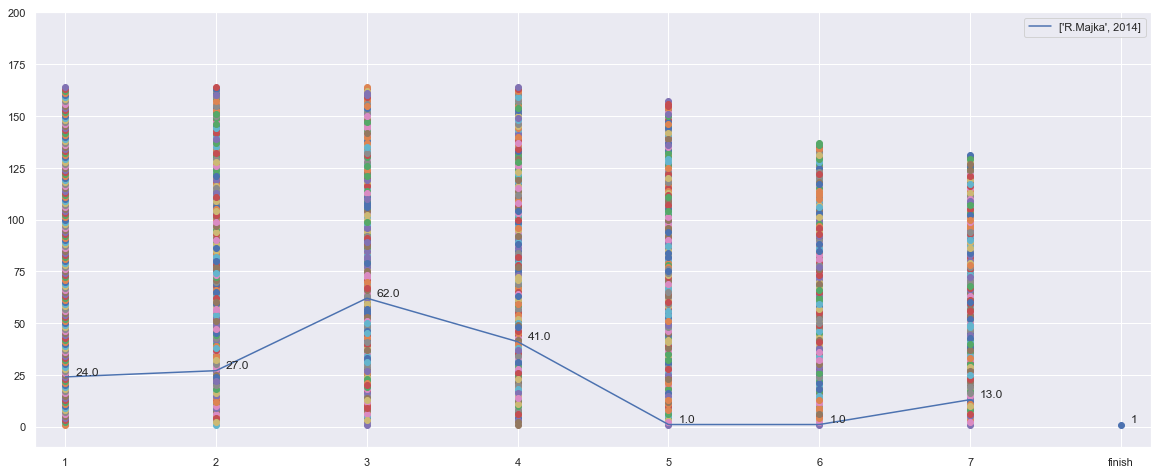

In [90]:
biker = 'R.Majka'

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

for year in np.arange(2014, 2015):

    x = stage_positions[stage_positions['year']==year]['stage'] 
    y = stage_positions[stage_positions['year']==year][biker]
    z = biker_class[(biker_class['year']==year) & (biker_class['name']==biker) & (biker_class['stage']==7)]['gc']

    if ((stage_positions['year']==year) & (stage_positions[biker].isnull())).any():
        continue
    else:
        plt.plot(x, y, label=[biker, year])
        plt.scatter(8, z, label='')   
        for biker_ in [b for b in stage_positions.columns[7:]]:
            plt.scatter(x, stage_positions[stage_positions['year']==year][biker_], label='')
        ax.annotate(str(z.values[0]), xy=(8,z), xytext=(10,2), textcoords='offset points')
        for i,j in zip(x,y):
            ax.annotate('%s' %j, xy=(i,j), xytext=(10,2), textcoords='offset points')
#             ax.annotate('(%s,' %i, xy=(i,j))

plt.xticks(np.arange(9), ('0','1','2','3','4','5','6','7','finish'), rotation=0)
plt.ylim(-10,200)
plt.xlim(0.8,8.2)
plt.legend()
plt.show()

In [91]:
def biker_omnitour_plot(biker):
    
    '''
    Plots stage positions in all tours the biker took part in. 
    '''

    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)

    for year in np.arange(2014, 2019):

        x = stage_positions[stage_positions['year']==year]['stage'] 
        y = stage_positions[stage_positions['year']==year][biker]
        z = biker_class[(biker_class['year']==year) & (biker_class['name']==biker) & (biker_class['stage']==7)]['gc']

        if ((stage_positions['year']==year) & (stage_positions[biker].isnull())).any():
            continue
        else:
            plt.plot(x, y, label=[biker, year])
            plt.scatter(8, z, label='')        
            ax.annotate(str(z.values[0]), xy=(8,z), xytext=(10,2), textcoords='offset points')
            for i,j in zip(x,y):
                ax.annotate('%s' %j, xy=(i,j), xytext=(10,2), textcoords='offset points')
    #             ax.annotate('(%s,' %i, xy=(i,j))

    plt.xticks(np.arange(9), ('0','1','2','3','4','5','6','7','finish'), rotation=0)
    #     plt.ylim(0,100)
    plt.xlim(0.8,8.2)
    plt.legend()
    plt.show()

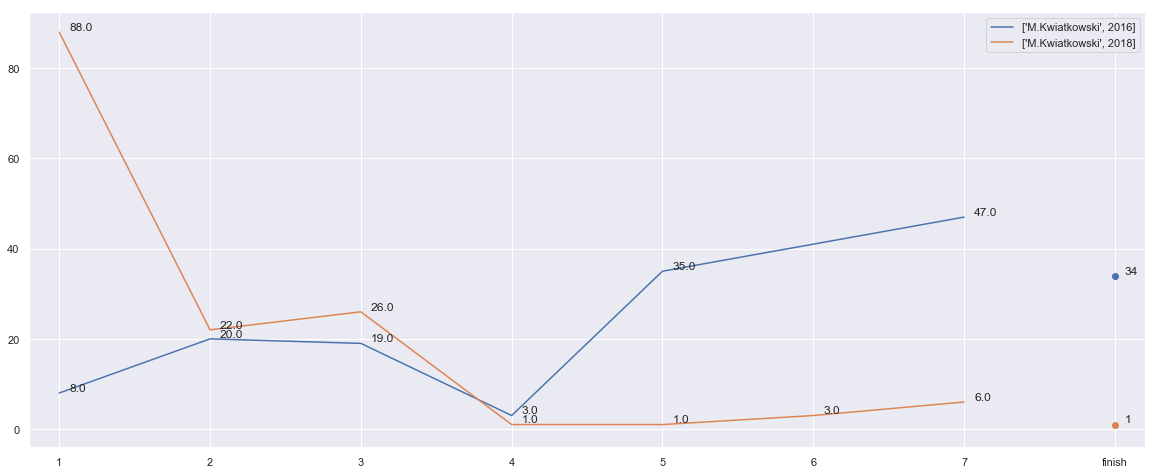

In [92]:
biker_omnitour_plot('M.Kwiatkowski')

In [93]:
def top10_bikers_positions(year):
    
    '''
    Plots Top10 Bikers in a given year.
    '''

    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)

    for biker_selector in biker_class[(biker_class['year']==year) \
                                      & (biker_class['stage']==7)].sort_values('gc', ascending=True)['name'].values[:10]:

        x = stage_positions[stage_positions['year']==year]['stage'] 
        y = stage_positions[stage_positions['year']==year][biker_selector]
        z = biker_class[(biker_class['year']==year) & (biker_class['name']==biker_selector) & (biker_class['stage']==7)]['gc']

        if ((stage_positions['year']==year) & (stage_positions[biker_selector].isnull())).any():
            continue
        else:
            plt.plot(x, y, label=[biker_selector, year])
            plt.scatter(8, z, label='')
            plt.title('Tour de Pologne {}'.format(year))
            ax.annotate(str(z.values[0]), xy=(8,z), xytext=(10,2), textcoords='offset points')
            for i,j in zip(x,y):
                ax.annotate('%s' %j, xy=(i,j), xytext=(10,2), textcoords='offset points')
    #             ax.annotate('(%s,' %i, xy=(i,j))

    plt.xticks(np.arange(9), ('0','1','2','3','4','5','6','7','finish'), rotation=0)
    #     plt.ylim(0,100)
    plt.xlim(0.8,8.2)
    plt.legend()
    plt.show()

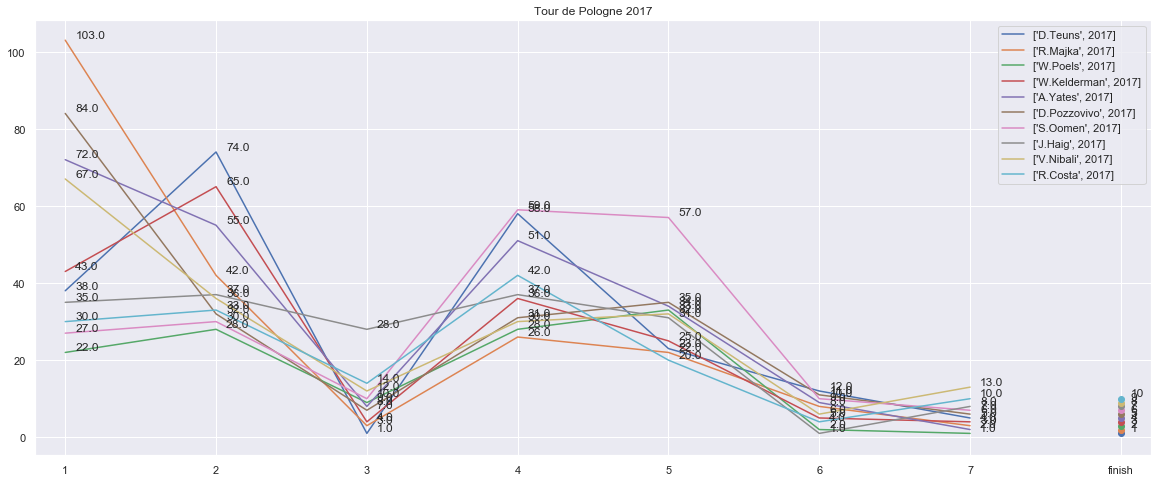

In [94]:
top10_bikers_positions(2017)

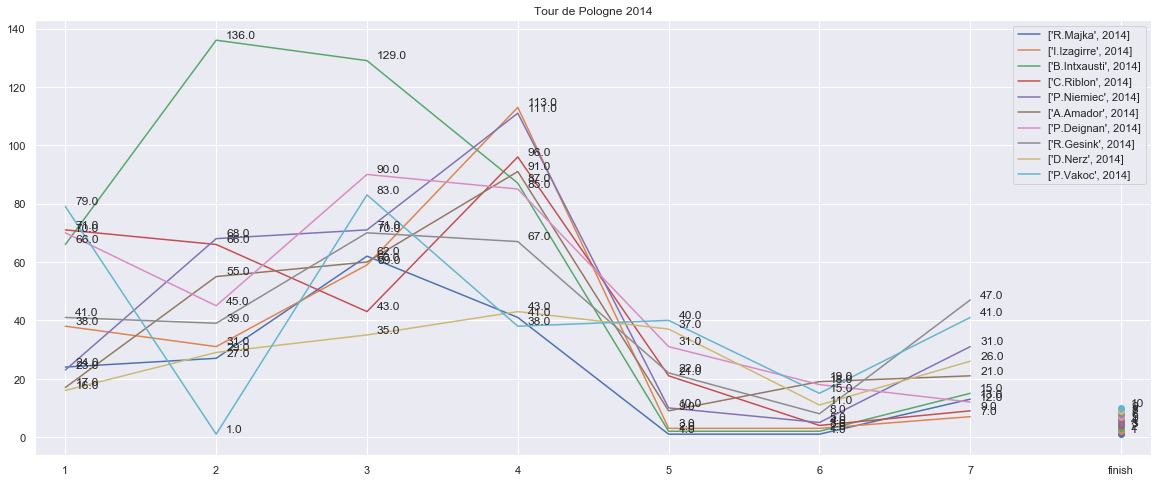

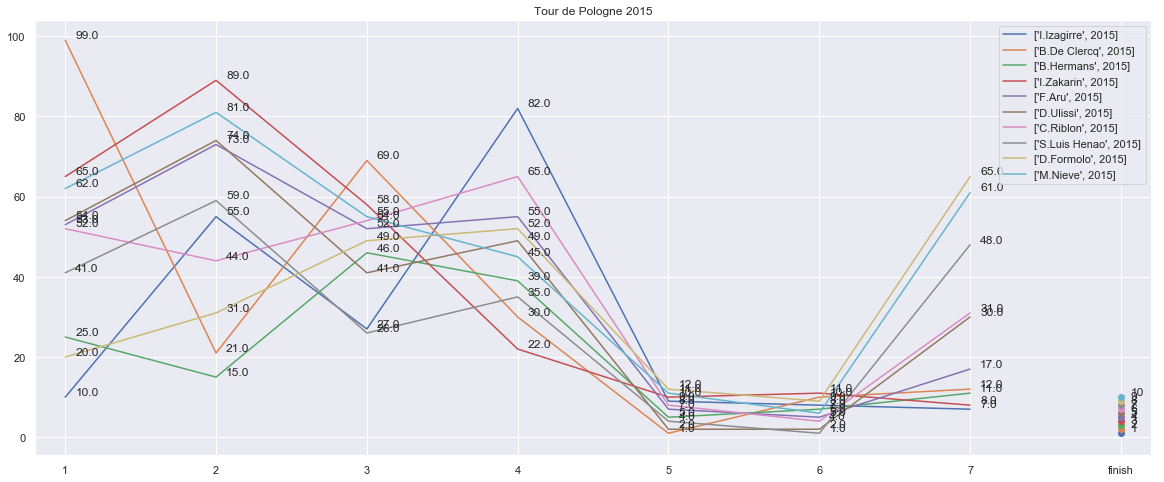

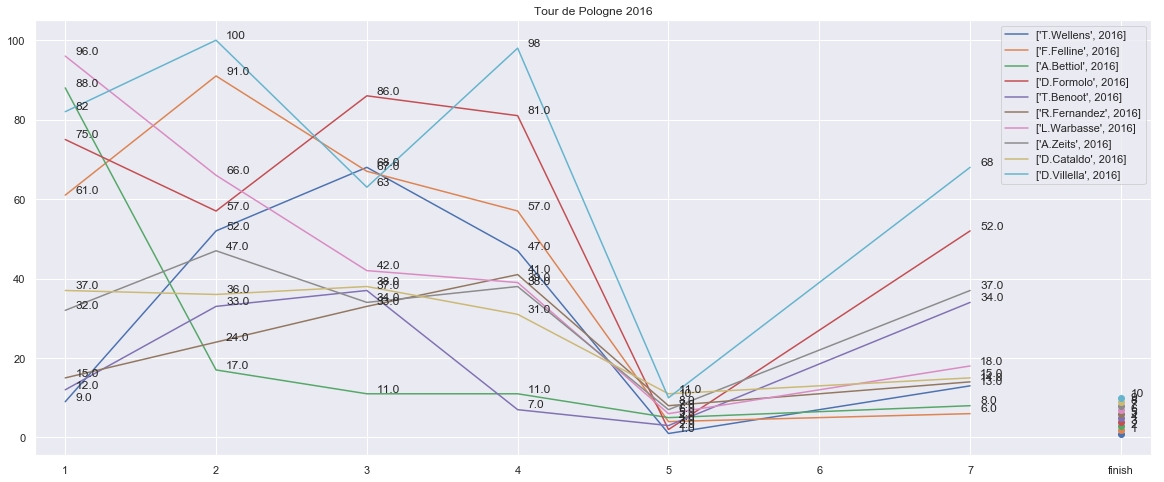

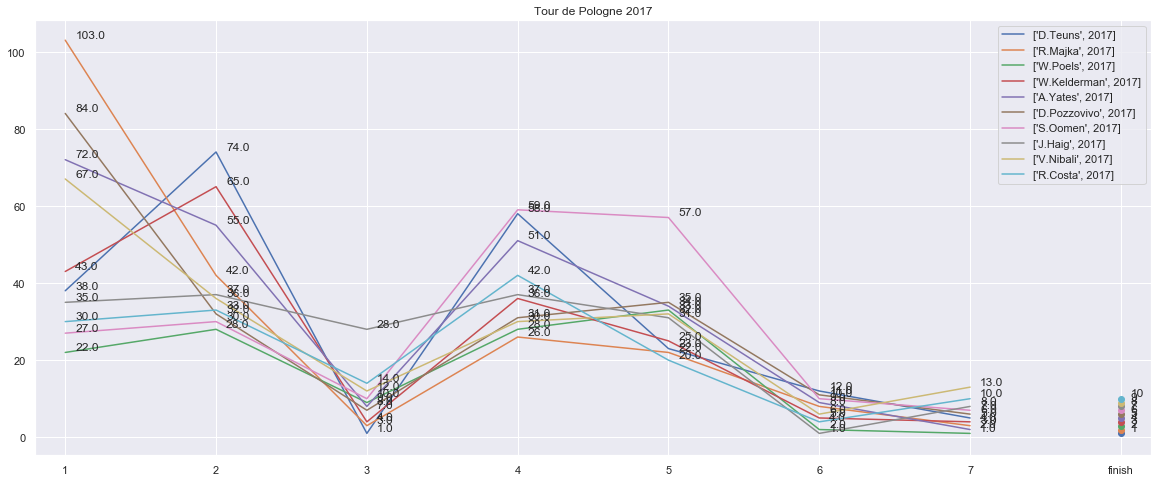

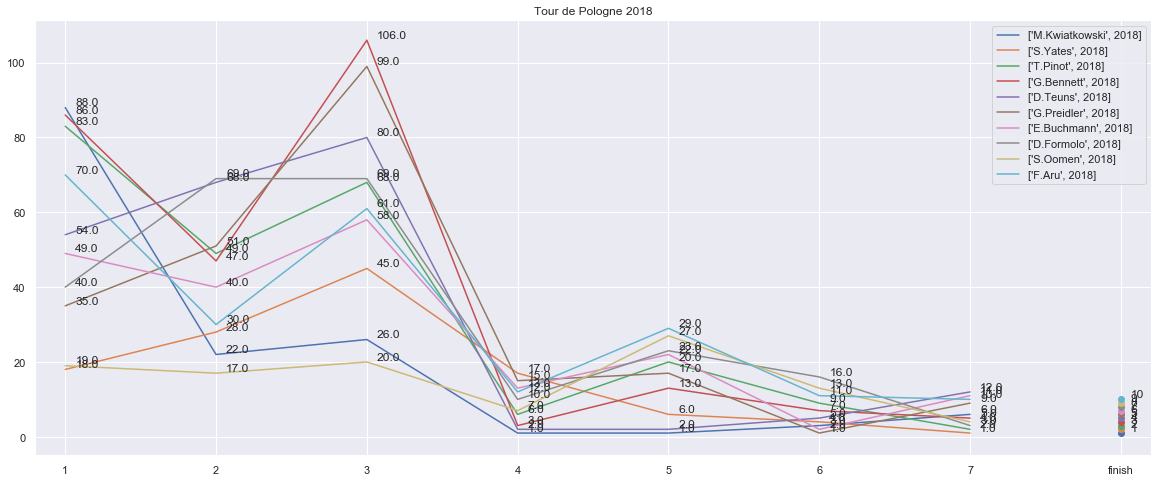

In [95]:
for year in np.arange(2014, 2019):
    top10_bikers_positions(year)